In [1]:
pip install pandas numpy matplotlib seaborn jupyter



   ---------------------------------------- 4/4 [isoduration]

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [16]:
# Load the dataset
df = pd.read_csv('IPL_Squad_2023_Auction_Dataset.csv')
print(df.head())

# dataset shape
print(f"Dataset Shape: {df.shape}")


   Unnamed: 0    Player's List Base Price          TYPE  COST IN ₹ (CR.)  \
0           0      Shivam Mavi    4000000        BOWLER              6.0   
1           1    Joshua Little    5000000        BOWLER              4.4   
2           2  Kane Williamson   20000000       BATSMAN              2.0   
3           3      K.S. Bharat    2000000  WICKETKEEPER              1.2   
4           4     Mohit Sharma    5000000        BOWLER              0.5   

   Cost IN $ (000) 2022 Squad            Team  
0            720.0        KKR  Gujarat Titans  
1            528.0        NaN  Gujarat Titans  
2            240.0        SRH  Gujarat Titans  
3            144.0         DC  Gujarat Titans  
4             60.0        NaN  Gujarat Titans  
Dataset Shape: (568, 8)


In [17]:
df.info() # Get dataset information
print(df.columns) # Check column names
df.describe() # Statistical summary
print(df.isnull().sum()) # Check for missing values
print(df.dtypes) # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       568 non-null    int64  
 1   Player's List    568 non-null    object 
 2   Base Price       568 non-null    object 
 3   TYPE             568 non-null    object 
 4   COST IN ₹ (CR.)  243 non-null    float64
 5   Cost IN $ (000)  243 non-null    float64
 6   2022 Squad       230 non-null    object 
 7   Team             568 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.6+ KB
Index(['Unnamed: 0', 'Player's List', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2022 Squad', 'Team'],
      dtype='object')
Unnamed: 0           0
Player's List        0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    325
Cost IN $ (000)    325
2022 Squad         338
Team                 0
dtype: int64
Unnamed: 0           int64

In [18]:
#Data cleaning and Check unnamed missing values
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Handle missing values in 'COST IN ₹ (CR.)' column
df['COST IN ₹ (CR.)'].fillna(0, inplace=True)

# Handle missing values in '2022 Squad' column
df['2022 Squad'].fillna('New Player', inplace=True)

# Create status column (Sold vs Unsold)
df['Status'] = df['Team'].apply(lambda x: 'Sold' if x != 'Unsold' else 'Unsold')

# Display cleaned data
print(df.head())


     Player's List Base Price          TYPE  COST IN ₹ (CR.)  Cost IN $ (000)  \
0      Shivam Mavi    4000000        BOWLER              6.0            720.0   
1    Joshua Little    5000000        BOWLER              4.4            528.0   
2  Kane Williamson   20000000       BATSMAN              2.0            240.0   
3      K.S. Bharat    2000000  WICKETKEEPER              1.2            144.0   
4     Mohit Sharma    5000000        BOWLER              0.5             60.0   

   2022 Squad            Team Status  
0         KKR  Gujarat Titans   Sold  
1  New Player  Gujarat Titans   Sold  
2         SRH  Gujarat Titans   Sold  
3          DC  Gujarat Titans   Sold  
4  New Player  Gujarat Titans   Sold  


C:\Users\ROG\AppData\Local\Temp\ipykernel_3968\3757490469.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COST IN ₹ (CR.)'].fillna(0, inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_3968\3757490469.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

TYPE
ALL-ROUNDER     213
BOWLER          189
BATSMAN          91
WICKETKEEPER     75
Name: count, dtype: int64


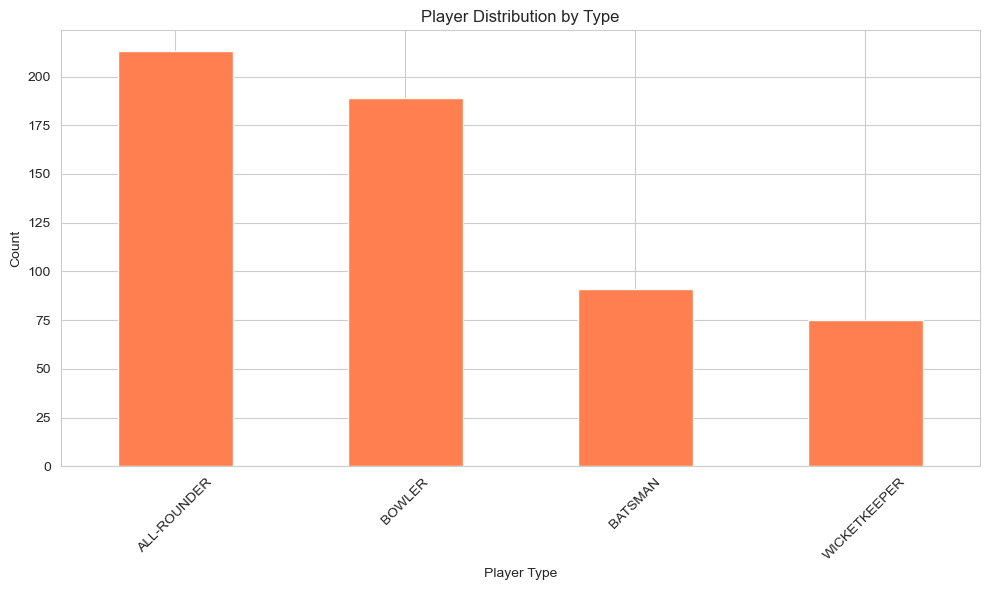

In [19]:
# Count players by type
player_type_count = df['TYPE'].value_counts()
print(player_type_count)

# Visualize
plt.figure(figsize=(10, 6))
player_type_count.plot(kind='bar', color='coral')
plt.title('Player Distribution by Type')
plt.xlabel('Player Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        Player's List          TYPE  COST IN ₹ (CR.)                  Team
97         Sam Curran   ALL-ROUNDER            18.50    Punjab Super Kings
144     Cameron Green   ALL-ROUNDER            17.50        Mumbai Indians
25         Ben Stokes   ALL-ROUNDER            16.25   Chennai Super Kings
119   Nicholas Pooran  WICKETKEEPER            16.00  Lucknow Super Giants
218       Harry Brook       BATSMAN            13.25   Sunrisers Hyderabad
219    Mayank Agarwal       BATSMAN             8.25   Sunrisers Hyderabad
0         Shivam Mavi        BOWLER             6.00        Gujarat Titans
193      Jason Holder   ALL-ROUNDER             5.75      Rajasthan Royals
50       Mukesh Kumar        BOWLER             5.50        Delhi Capitals
220  Heinrich Klaasen  WICKETKEEPER             5.25   Sunrisers Hyderabad


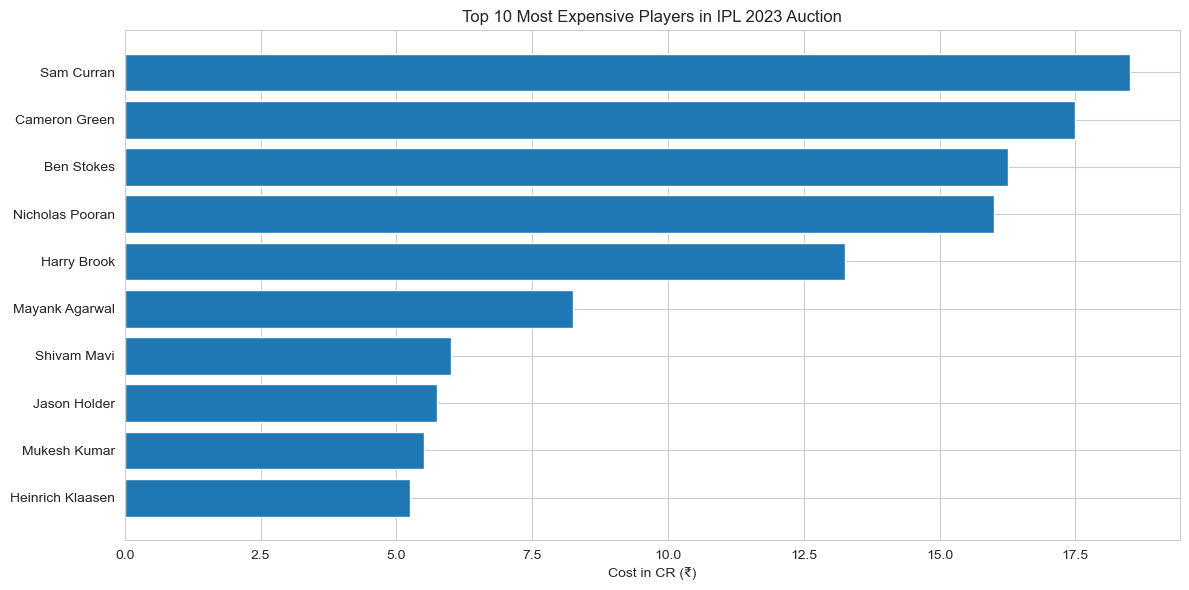

In [7]:
# Get top 10 most expensive players
top_expensive = df.nlargest(10, 'COST IN ₹ (CR.)')
print(top_expensive[['Player\'s List', 'TYPE', 'COST IN ₹ (CR.)', 'Team']])

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(top_expensive['Player\'s List'], top_expensive['COST IN ₹ (CR.)'])
plt.xlabel('Cost in CR (₹)')
plt.title('Top 10 Most Expensive Players in IPL 2023 Auction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Team
Sunrisers Hyderabad           35.70
Mumbai Indians                20.50
Punjab Super Kings            20.00
Lucknow Super Giants          19.80
Chennai Super Kings           18.95
Delhi Capitals                15.00
Gujarat Titans                14.80
Rajasthan Royals               9.85
Royal Challengers Banglore     7.00
Kolkata Knight Riders          5.40
Name: COST IN ₹ (CR.), dtype: float64


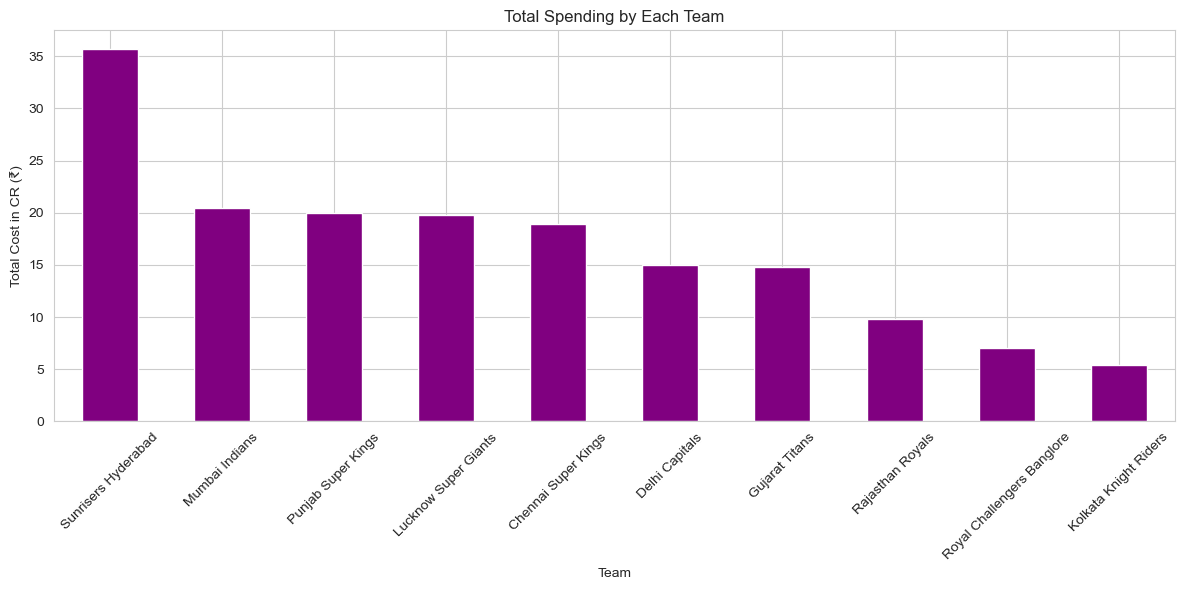

In [20]:
# Calculate total spending by each team
team_spending = df[df['Status'] == 'Sold'].groupby('Team')['COST IN ₹ (CR.)'].sum().sort_values(ascending=False)
print(team_spending)

# Visualize
plt.figure(figsize=(12, 6))
team_spending.plot(kind='bar', color='purple')
plt.title('Total Spending by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Cost in CR (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TYPE                        ALL-ROUNDER  BATSMAN  BOWLER  WICKETKEEPER
Team                                                                  
Chennai Super Kings                  10        6       8             1
Delhi Capitals                       10        5       8             2
Gujarat Titans                        8        4       9             4
Kolkata Knight Riders                 6        3      10             3
Lucknow Super Giants                 12        2       9             2
Mumbai Indians                       12        3       6             3
Punjab Super Kings                    9        3       6             4
Rajasthan Royals                      5        4      11             5
Royal Challengers Banglore            8        5      10             2
Sunrisers Hyderabad                   7        6       8             4


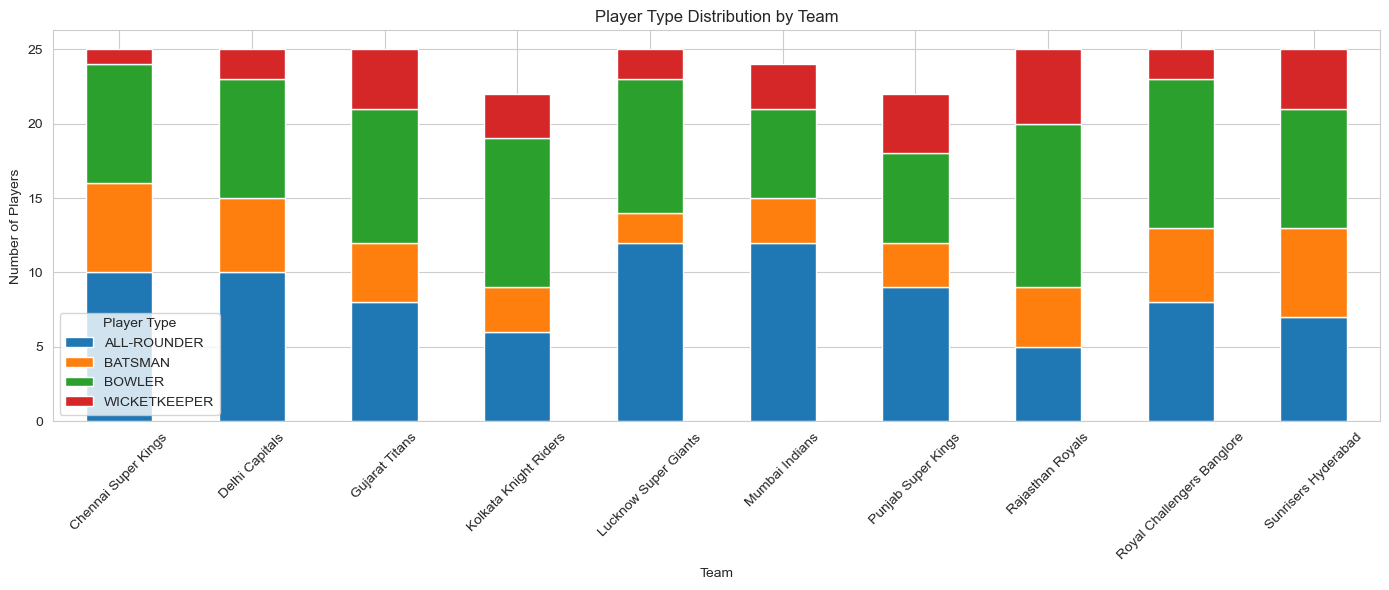

In [22]:
# Players by type for each team
type_by_team = df[df['Status'] == 'Sold'].groupby(['Team', 'TYPE']).size().unstack(fill_value=0)
print(type_by_team)

# Visualize
type_by_team.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Player Type Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.legend(title='Player Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Status
Unsold    325
Sold      243
Name: count, dtype: int64


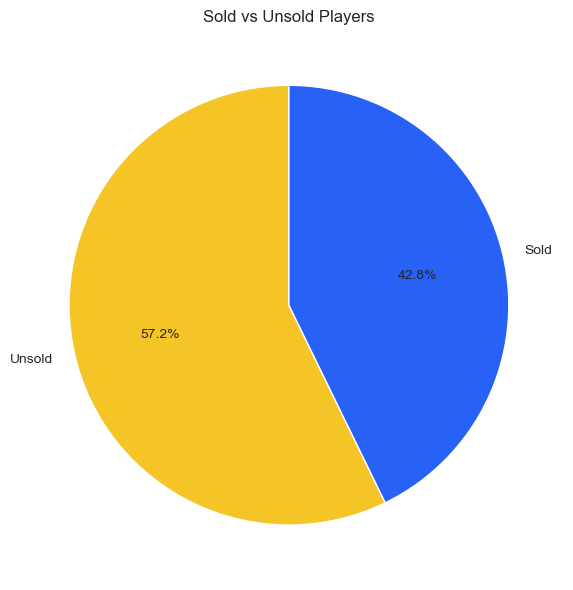

In [25]:
# Count sold vs unsold players
status_count = df['Status'].value_counts()
print(status_count)

# Visualize with pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', startangle=90, colors=['#F5C527', '#2761F5'])
plt.title('Sold vs Unsold Players')
plt.tight_layout()
plt.show()


In [11]:
# Average cost by player type
avg_cost_by_type = df[df['Status'] == 'Sold'].groupby('TYPE')['COST IN ₹ (CR.)'].mean().sort_values(ascending=False)
print(avg_cost_by_type)

# Retained vs New players analysis
retained_new = df.groupby(['Base Price']).size()
print(retained_new)

# Count of players from previous teams
prev_team_count = df['2022 Squad'].value_counts().head(10)
print(prev_team_count)


TYPE
WICKETKEEPER    0.920000
BATSMAN         0.890244
ALL-ROUNDER     0.813218
BOWLER          0.378235
Name: COST IN ₹ (CR.), dtype: float64
Base Price
10000000     20
1500000      10
15000000      1
2000000     274
20000000     19
3000000       4
4000000       7
5000000      61
7500000       9
Retained    163
dtype: int64
2022 Squad
New Player    338
MI             28
PBKS           24
RR             24
CSK            24
DC             23
KKR            22
SRH            22
GT             22
LSG            21
Name: count, dtype: int64


In [12]:
# Save cleaned dataset
df.to_csv('IPL_2023_Cleaned.csv', index=False)

# Save summary statistics
summary = df.describe()
summary.to_csv('IPL_2023_Summary.csv')

print("Analysis complete! Results saved.")


Analysis complete! Results saved.


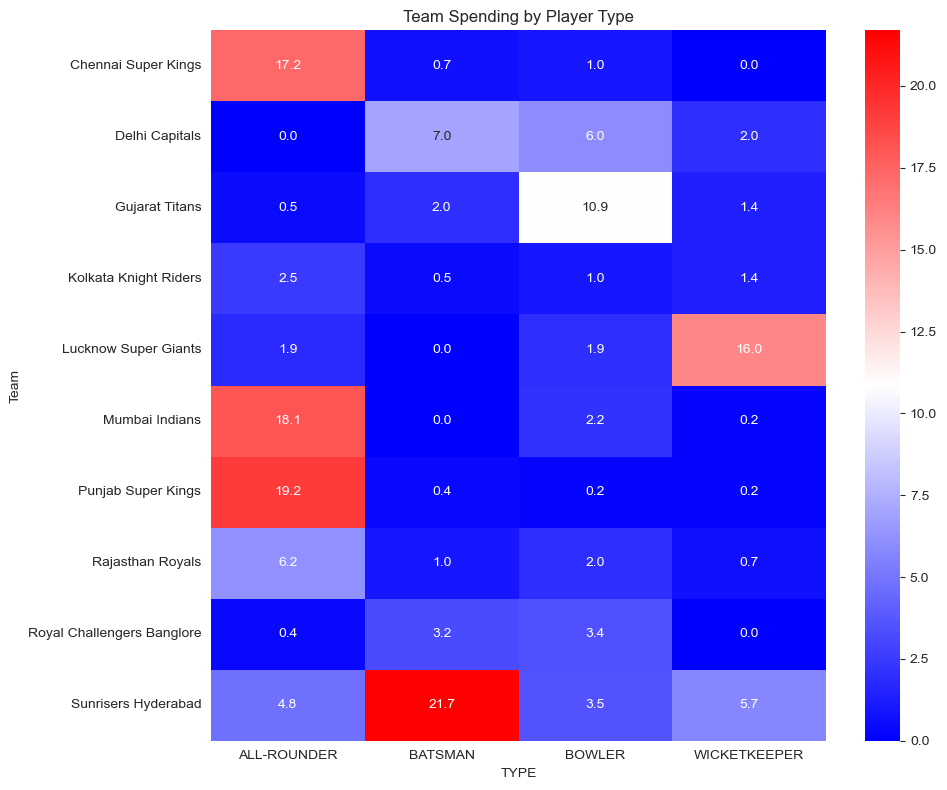

In [36]:
# Heatmap of team spending patterns
plt.figure(figsize=(10, 8))
pivot_data = df[df['Status'] == 'Sold'].pivot_table(
    values='COST IN ₹ (CR.)',
    index='Team',
    columns='TYPE',
    aggfunc='sum',
    fill_value=0
)
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='bwr')
plt.title('Team Spending by Player Type')
plt.tight_layout()
plt.show()


In [14]:
# Generate key insights
total_players = len(df)
sold_players = len(df[df['Status'] == 'Sold'])
total_spent = df['COST IN ₹ (CR.)'].sum()
avg_cost = df[df['COST IN ₹ (CR.)'] > 0]['COST IN ₹ (CR.)'].mean()

print("=" * 50)
print("IPL 2023 AUCTION ANALYSIS SUMMARY")
print("=" * 50)
print(f"Total Players: {total_players}")
print(f"Sold Players: {sold_players}")
print(f"Unsold Players: {total_players - sold_players}")
print(f"Total Amount Spent: ₹{total_spent:.2f} CR")
print(f"Average Player Cost: ₹{avg_cost:.2f} CR")
print("=" * 50)


IPL 2023 AUCTION ANALYSIS SUMMARY
Total Players: 568
Sold Players: 243
Unsold Players: 325
Total Amount Spent: ₹167.00 CR
Average Player Cost: ₹2.09 CR
